In [2]:
import pandas as pd
import numpy as np

In [3]:
File = pd.read_csv("playstore-analysis (2) (1).csv")

In [4]:
File.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


#Data clean up – Missing value treatment

In [5]:
print(f"{File.isnull().sum()}")

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


a. Drop records where rating is missing since rating is our target/study variable

In [6]:
drop =File.dropna(subset=['Rating'])

b. Check the null values for the Android Ver column. 

In [7]:
print(f"{drop['Android Ver'].isnull().sum()}")

3


In [8]:
df = pd.DataFrame(drop[drop.isna().any(axis=1)])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


i. Are all 3 records having the same problem?
    YES


In [9]:
d2 = drop.drop(10472)

ii. Droped the 3rd record i.e. record for “Life Made WIFI …”

In [10]:
d2[d2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


3rd row was droped successfully

In [48]:
av = d2['Android Ver'].to_list()

iii. Replace remaining missing values with the mode

In [49]:
import statistics
udata = d2.fillna(statistics.mode(av))

print(udata.loc[[4490]])
print('*********************************************')
print(udata.loc[4053])

                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490  4.1 and up  
*********************************************
App               Dance School Stories - Dance Dreams Come True
Category                                                 FAMILY
Rating                                                      4.4
Reviews                                                   91171
Size                                                      36000
Installs                                             1,000,000+
Type                                                       Free
Price                                                         0
Content Rating                                         Everyone
Genres            

Now Android Ver is 4.1

In [14]:
print(f"Missing Values :{udata['Current Ver'].isnull().sum()}")

Missing Values :0


c. Current ver – replace with most common value - No missing value is observed

# 2. Data clean up – correcting the data types

In [15]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


a. Which all variables need to be brought to numeric types? -- "Reviews" and "Size"

In [16]:
udata['Reviews'] = udata['Reviews'].astype(int)
udata['Size'] = udata['Size'].astype(int)

In [17]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), int32(2), object(10)
memory usage: 1.2+ MB


Successfully brought two variables to numeric types

b. Price variable – remove $ sign and convert to float

In [18]:
udata['Price'] = udata['Price'].str.replace('$','')


In [19]:
udata.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [20]:
udata['Price'] = udata['Price'].astype(float)

In [21]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1.2+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [22]:
udata['Installs'] = udata['Installs'].str.replace(',','')
udata['Installs'] = udata['Installs'].str.replace('+','')

In [23]:
udata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
udata['Installs'] = udata['Installs'].astype(int)

In [25]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int32  
 4   Size            9366 non-null   int32  
 5   Installs        9366 non-null   int32  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(2), int32(3), object(8)
memory usage: 1.2+ MB


',' and '+' sign is removed and converted into int

# 3. Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play
store

In [26]:
arr = pd.unique(udata[['Rating']].values.ravel())
arr

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Yes all Avg. rating values is in between 1 and 5

In [27]:
for i in arr:
    if i > 5:
        print("Need to drop")
    elif i < 1:
        print("Need to drop")
    else:
        print("No need to drop")

No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop
No need to drop


i. Are there any such records? Drop if so - No

b. Reviews should not be more than installs as only those who installed can review the
app.

In [28]:
dff = pd.DataFrame()
dff = udata[udata.Reviews <= udata.Installs]
dff.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [29]:
dff.shape

(9359, 13)

# 4. Identify and handle outliers –

a. Price column
   i. Make suitable plot to identify outliers in price

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\91928\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Apps')

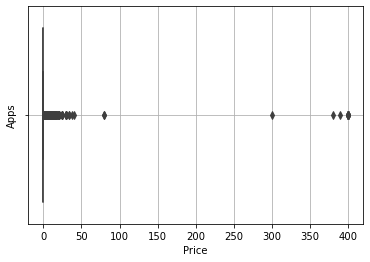

In [31]:
sns.boxplot(udata.Price)
plt.grid(linestyle='-')
plt.ylabel('Apps')

As using above boxplot we can observe the outliers in price colmn.

ii. Do you expect apps on the play store to cost $200? Check out these cases

In [32]:
overprice = dff[dff['Price']==200]
print(overprice)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In original dataframe there was a row of app $200 but rating colmn was blank and priviously we drop data whose Rating value is null.
Hence in new data frame we got Empty DataFrame

iii. After dropping the useless records, make the suitable plot again to identify
outliers

C:\Users\91928\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Apps')

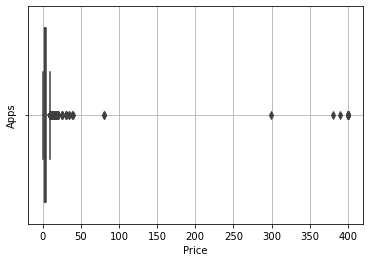

In [33]:
#IN order to do this we have to remove values where price = 0
rvalues = dff[dff['Price']!=0]
sns.boxplot(rvalues.Price)
plt.grid()
plt.ylabel('Apps')


iv. Limit data to records with price < $30

In [34]:
ldata = dff[dff['Price']<30]
ldata.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [35]:
ldata.shape

(9338, 13)

b. Reviews column
    i. Make suitable plot

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241071
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893622
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

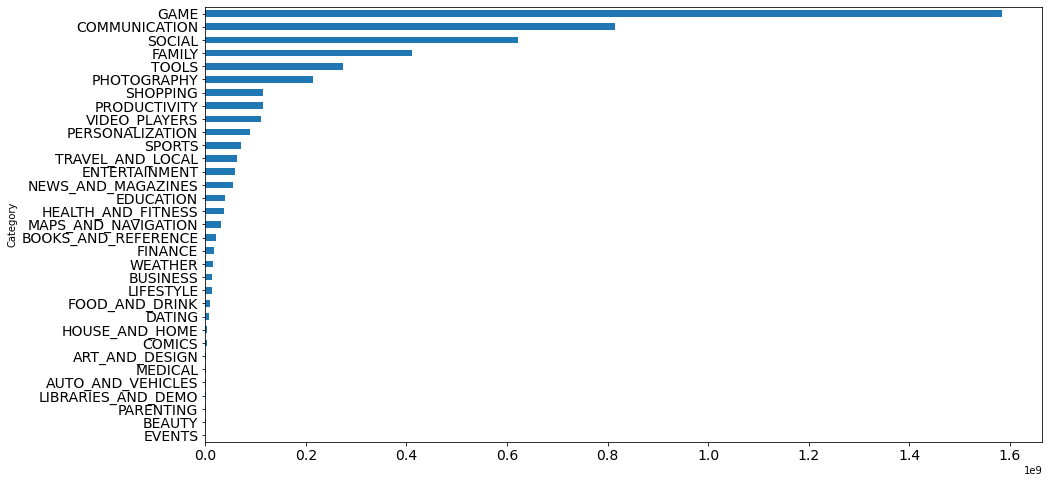

In [36]:
total=dff.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

ii. Limit data to apps with < 1 Million reviews

In [37]:
limit= dff[dff['Reviews'] < 1000000]
limit.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [38]:
limit.shape

(8655, 13)

c. Installs 
    i. What is the 95th percentile of the installs?

In [39]:
value = limit.Installs.quantile(0.95) # 95th percentile
print(value)

10000000.0


ii. Drop records having a value more than the 95th percentile

In [40]:
x = limit.Installs.quantile() > value
print (x)

False


There are no such values which is more than 95th percentile

# Data analysis to answer business questions

## 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower

C:\Users\91928\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


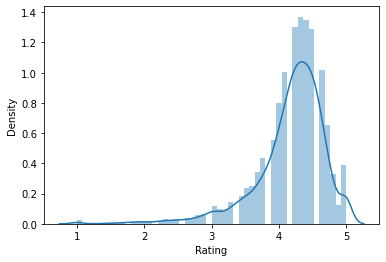

In [41]:
sns.distplot(limit['Rating'])
plt.show()

6. What are the top Content Rating values?

In [42]:
limit['Content Rating'].value_counts()

Everyone           6963
Teen                934
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

a. Are there any values with very few records?
Yes. 'Unrated' Content Rating has value 1 and Adults only 18+ has 3

In [43]:
adult = limit[limit['Content Rating']=='Adults only 18+'].index.to_list()
urated = limit[limit['Content Rating']=='Unrated'].index.to_list()


b. If yes, drop those as they won’t help in the analysis

In [44]:
limit.drop(adult, inplace = True)
limit.drop(urated, inplace = True)
limit['Content Rating'].value_counts()


C:\Users\91928\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Everyone        6963
Teen             934
Mature 17+       417
Everyone 10+     337
Name: Content Rating, dtype: int64

2 records droped successfully

## 7. Effect of size on rating
a. Make a joinplot to understand the effect of size on rating

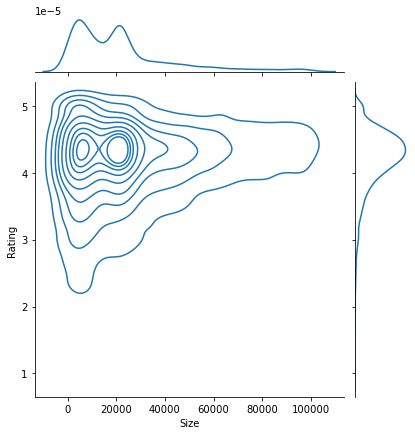

In [45]:
sns.jointplot(x=limit['Size'],y=limit['Rating'],data = limit ,kind='kde')
plt.show()

b. Do you see any patterns?

We observed that the maximum data point gather in between Rating 4.0-4.5 and size 0-40000kb(40 mb).

In [46]:
c. How do you explain the pattern?

Object `pattern` not found.


In [ ]:
c. How do you explain the pattern

In [47]:
c. How do you explain the pattern

SyntaxError: invalid syntax (<ipython-input-47-09063a2f2a73>, line 1)

c. How do you explain the pattern

Meaning is that the application size which is in between 0-40000(40 mb) get good rating on play store

## 8. Effect of price on rating
a. Make a jointplot (with regression line)

In [ ]:
sns.jointplot(x=limit['Rating'],y=limit['Price'],data = limit , kind = 'reg' )
plt.grid()
plt.show()

b. Do you see any patterns?

we can't seen too many below average rating as price incereases

c. How do you explain the pattern?


The paid Apps are slightly better than free or low price Apps 

d. Replot the data, this time with only records with price > 0 

In [ ]:
pgo = limit[limit['Price']>0]

In [ ]:
sns.jointplot(x ="Rating" , y = "Price" ,data = pgo, kind = "reg" )
plt.show()

e. Does the pattern change?

Yes the below average ratings slightly reduce

f. What is your overall inference on the effect of price on the rating

As the price increase of an Application the useres get slightly better experiance which is reflect in their ratings also.

## 9. Look at all the numeric interactions together –
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

In [ ]:
sns.pairplot(limit,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

## 10. Rating vs. content rating
a. Make a bar plot displaying the rating for each content rating

In [ ]:
a = limit['Rating'].groupby(limit['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

In [ ]:
limit.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

## 11. Content rating vs. size vs. rating – 3 variables at a time
a. Create 5 buckets (20% records in each) based on Size

In [ ]:
sns.distplot(limit["Size"], bins=5)
plt.show()

In [ ]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
limit['Size_Buckets'] = pd.cut(limit['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(limit, values='Rating', index='Size_Buckets', columns='Content Rating')

b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each
combination

In [ ]:
limit.Size.quantile([0.2, 0.4,0.6,0.8])

In [ ]:
limit.Rating.quantile([0.2, 0.4,0.6,0.8])

c. Make a heatmap of this
i. Annotated

In [ ]:
Size_Buckets =pd.pivot_table(limit, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

In [ ]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

ii. Greens color map

In [ ]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some? -
Yes, most of havier apps seems to be more preferred in all the Content Ratings. But, not to a big variations in it.
Except, Mature 17+ where low size apps arent preferred to a greater variation.